In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import util
from importlib import reload
reload(util)
from util import *
from scipy.stats import binned_statistic

# Kennlinien PM3

In [173]:
eta = .03
rt = 506/60
T = 1/eta**2*1/rt
T

131.75230566534913

In [174]:
N=1148
c=N/T
dc=np.sqrt(N)/T
dc/c

0.029514066805047763

## Plot

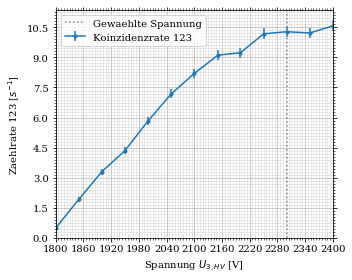

In [175]:
%matplotlib inline

T = 140
fig, ax = set_up_plot()
calib = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx',
                      sheet_name='Kennl')
ax.set_xlabel('Spannung $U_{3,HV}$ [V]')
ax.set_ylabel('Zaehlrate 123 [$s^{-1}$]')
ax.errorbar(calib['U/V'], calib["N123"]/T, yerr=np.sqrt(calib["N123"])/T,
            marker='.', label='Koinzidenzrate 123')
ax.axvline(2300, linestyle='dotted', color='gray', label='Gewaehlte Spannung')
ax.legend()
ax.set_xlim([calib['U/V'].min(), calib['U/V'].max()])
ax.set_ylim(0)
save_fig(fig, 'kennlinie_123', 'vorversuch')


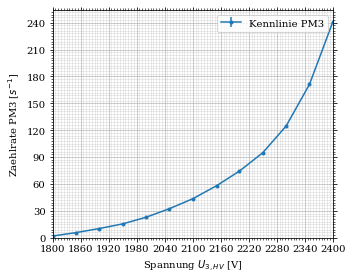

In [176]:
fig, ax = set_up_plot()
calib = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx',
                      sheet_name='Kennl')
ax.set_xlabel('Spannung $U_{3,HV}$ [V]')
ax.set_ylabel('Zaehlrate PM3 [$s^{-1}$]')
ax.errorbar(calib['U/V'], calib["N3"]/T, yerr=np.sqrt(calib["N3"])/T,
            marker='.', label='Kennlinie PM3')
ax.legend()
ax.set_xlim([calib['U/V'].min(), calib['U/V'].max()])
ax.set_ylim(0)
save_fig(fig, 'kennlinie_pm3', 'vorversuch')

# Peakhoehen der Photomultiplier

In [177]:
peaks = pd.read_excel('../messungen/vorversuch_kennlinnien.xlsx')
peak_labels = ['P1', 'P2', 'P3']
bin_offsets = [8, 15, 40]
scale_factors = [100, 10, 1]

In [178]:
for peak in peak_labels:  # nice and dirty :{}
    cur = peaks[peak]
    print(f"{peak} & {cur.min():.2f} & {cur.max():.2f} & {cur.mean():.2f} & {cur.median():.2f} & {cur.mean()/cur.std():.2f} \\\\")
peaks['dP1'] = calculate_peak_uncertainty(peaks["P1"])
peaks['dP2'] = calculate_peak_uncertainty(peaks["P2"])
peaks['dP3'] = calculate_peak_uncertainty(peaks["P3"])


P1 & 0.20 & 3.00 & 0.72 & 0.60 & 1.31 \\
P2 & 0.20 & 11.40 & 4.44 & 3.60 & 1.89 \\
P3 & 3.60 & 51.20 & 9.30 & 7.00 & 1.06 \\


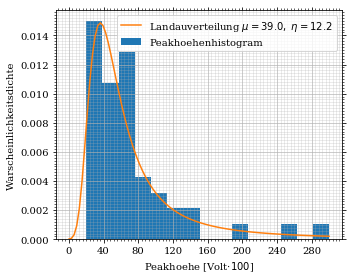

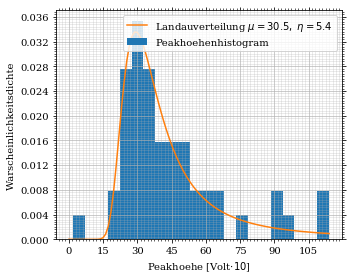

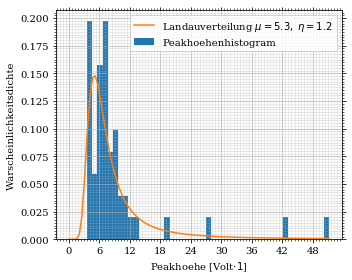

In [179]:
for index, peak in enumerate(peak_labels):
    plot_hist(peaks[peak], calculate_bins(peaks[peak]) + bin_offsets[index],
              scale_factors[index],
              save=(f'muon_{peak}_spec', 'vorversuch'))

# Statistische Auswertung der Langzeitmessung

In [180]:
counts = load_counts('../messungen/LM_2019_12_20.txt')
interval = (22, 150)

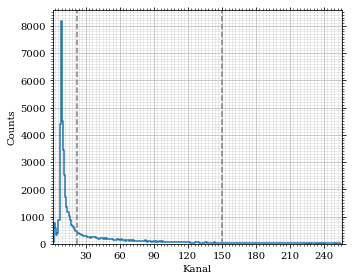

In [181]:
fig, ax = plot_spectrum(counts)
ax.axvline(interval[0], color='grey', linestyle='--')
ax.axvline(interval[1], color='grey', linestyle='--')
save_fig(fig, 'spectrum_overview', 'haupt')

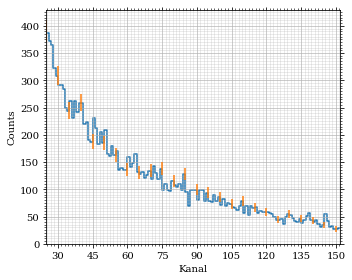

In [182]:
fig, ax = plot_spectrum(counts[interval[0]:interval[1]], offset=25, errorevery=5, zorder=-100)
save_fig(fig, 'spectrum_detail', 'haupt')


In [183]:
len(counts[interval[0]:interval[1]])
counts.sum()

52791

In [184]:
chan_to_time(1, center=False)

41.666666666666664

In [185]:
tau, d_tau, N, T, taus, correction = continous(counts, interval)

In [186]:
N, tau, d_tau, T, correction

(15565,
 2215.858394798602,
 47.44264196328607,
 5333.333333333334,
 2.7056782698244173)

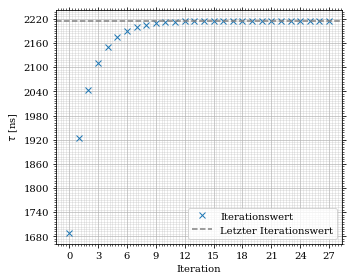

In [187]:
fig, ax = set_up_plot()
ax.plot(taus, linestyle='None', marker='x', label='Iterationswert')
ax.set_xlabel('Iteration')
ax.axhline(tau, color='gray', linestyle='--', label='Letzter Iterationswert')
ax.set_ylabel(r'$\tau$ [ns]')
ax.legend()
#ax.set_xlim(0)
#ax.set_ylim(0)
save_fig(fig, 'continous', 'haupt')

In [188]:
weak_constant(tau=(tau, d_tau))

(1.1588507098277857e-05, 1.2405788078581655e-07)

In [189]:
constants.physical_constants['muon mass energy equivalent in MeV']

(105.6583745, 'MeV', 2.4e-06)

In [190]:
chan_to_time(22)

916.6666666666666

In [191]:
poisson, gauss, exp, N, N_0 = binned_likelihood(counts, interval)

((<Figure size 360x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f8f99721e50>),
 2215.8597355099128,
 (28.865576102124123, 29.573147134458395),
 -156017.98604455253,
 (1.1588503592450155e-05, 7.733082476479676e-08))

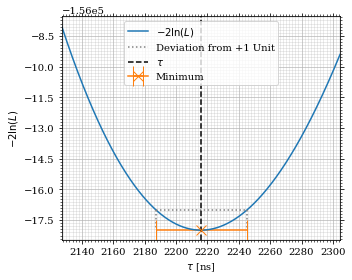

In [194]:
maximize_and_plot_likelihood(poisson, (1000, 3000), save=('poisson', 'haupt'))

((<Figure size 360x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f8f9a81c4f0>),
 2215.8597355718744,
 (28.86557616398568, 29.573147072302618),
 260578.66403135064,
 (1.1588503592288131e-05, 7.733082459902203e-08))

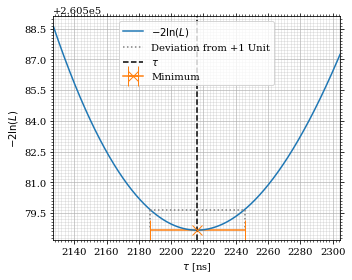

In [195]:
maximize_and_plot_likelihood(exp, (1000, 3000), save=('exp', 'haupt'))

((<Figure size 360x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f8f9a5f7bb0>),
 2220.8202879077535,
 (27.77746601227318, 28.497619166224922),
 242.6365765998969,
 (1.1575553981857487e-05, 7.42688930802203e-08))

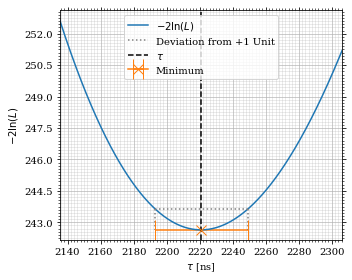

In [196]:
maximize_and_plot_likelihood(gauss, (1000, 3000), save=('gauss', 'haupt'))

In [197]:
exp(2216+50)-exp(2216)

array([2.82678971])

In [198]:
1000/24

41.666666666666664

In [199]:
exp(2216 + 1) - exp(2216)

array([0.00149841])

In [200]:
poisson

<function util.binned_likelihood.<locals>.ln_poisson_likelihood(tau)>

In [201]:
exp

<function util.binned_likelihood.<locals>.ln_exp_likelihood(tau)>